In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [237]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/spo2 vs r-r values/0-1000.csv")

In [238]:
df.head(1000)

,SpO2,rrvalues
0,97.3036,0.793
1,97.3044,0.796
2,97.3048,0.801
3,97.3037,0.850
4,97.3038,0.857
...,...,...
994,95.2979,0.806
995,95.2974,0.803
996,95.2969,0.773
997,95.2984,0.776


In [239]:
df.describe()

,SpO2,rrvalues
count,999.000000,999.000000
mean,96.300360,0.808598
std,0.868109,0.046056
min,93.288200,0.666000
25%,96.300300,0.778500
50%,96.301800,0.807000
75%,96.998500,0.837000
max,97.305600,0.983000


In [240]:
df.shape

(999, 2)

In [241]:
cdf = df[['SpO2','rrvalues']]
cdf.head(5)

,SpO2,rrvalues
0,97.3036,0.793
1,97.3044,0.796
2,97.3048,0.801
3,97.3037,0.850
4,97.3038,0.857


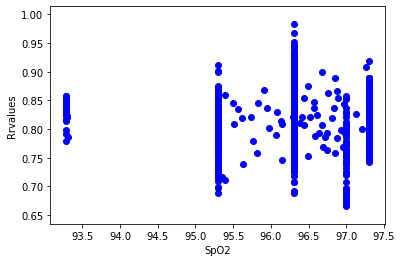

In [242]:
#graph of SNO vs r-r values

plt.scatter(cdf.SpO2, cdf.rrvalues,color='blue')
plt.xlabel('SpO2')
plt.ylabel('Rrvalues')
plt.show()

In [243]:
#splitting our data in 80-20 ratio for regression

In [245]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

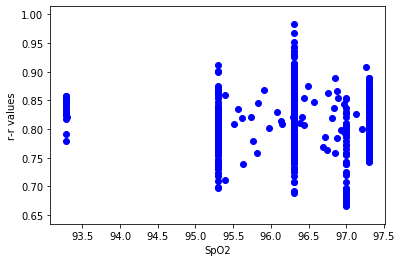

In [246]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.xlabel("SpO2")
plt.ylabel("r-r values")
plt.show()

In [247]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00091818]]
Intercept:  [0.8965348]


Text(0, 0.5, 'r-r values')

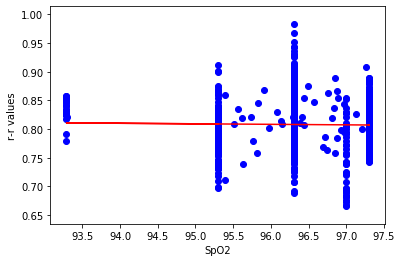

In [248]:
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("SpO2")
plt.ylabel("r-r values")

In [249]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -2888.54


In [250]:
#using polynomial regression

In [251]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['SpO2']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['SpO2']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 9.73036000e+01, 9.46799057e+03],
       [1.00000000e+00, 9.73048000e+01, 9.46822410e+03],
       [1.00000000e+00, 9.73037000e+01, 9.46801003e+03],
       ...,
       [1.00000000e+00, 9.52969000e+01, 9.08149915e+03],
       [1.00000000e+00, 9.52984000e+01, 9.08178504e+03],
       [1.00000000e+00, 9.52981000e+01, 9.08172786e+03]])

In [228]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -1.37471550e-03  1.64962442e-07]]
Intercept:  [3.54126412]


Text(0, 0.5, 'r-rvalues')

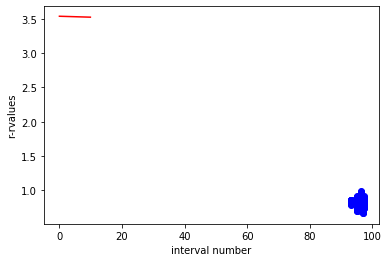

In [252]:
#plotting the polynomial regression
plt.scatter(train.SpO2, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("interval number")
plt.ylabel("r-rvalues")

In [253]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2.60
Residual sum of squares (MSE): 6.76
R2-score: -4642129.33
